In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/drive/MyDrive/NLP/Email Spam Classifier/spam.csv", encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4966,spam,You can donate å£2.50 to UNICEF's Asian Tsunam...,NaN,NaN,NaN
157,ham,"Hello, my love. What are you doing? Did you ge...",NaN,NaN,NaN
2101,ham,I thk 530 lor. But dunno can get tickets a not...,NaN,NaN,NaN
519,ham,Usually the person is unconscious that's in ch...,NaN,NaN,NaN
4688,ham,"Didn't try, g and I decided not to head out",NaN,NaN,NaN


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
3354,ham,Minimum walk is 3miles a day.
1101,ham,"Yeah go on then, bored and depressed sittin wa..."
1701,ham,Can come my room but cannot come my house cos ...
1430,ham,Don't look back at the building because you ha...
2915,ham,What time should I tell my friend to be around?


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.sample()

,target,text
4509,ham,This weekend is fine (an excuse not to do too ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
186,0,"Haha awesome, be there in a minute"
2366,1,Tone Club: Your subs has now expired 2 re-sub ...
1531,0,Oh dang! I didn't mean o send that to you! Lol!
4414,0,"Yeah I should be able to, I'll text you when I..."
1429,1,For sale - arsenal dartboard. Good condition b...


In [12]:
df.isnull().sum()

,0
target,0
text,0


In [13]:
print(df.duplicated().sum())

403


In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
print(df.duplicated().sum())

0


In [16]:
df.shape

(5169, 2)

## EDA

In [17]:
df['target'].value_counts()

,count
target,
0,4516
1,653


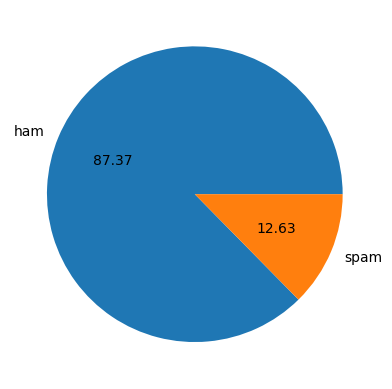

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# thus we can conclude that there is an imbalance in the dataset

In [20]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
df['num_characters']=df['text'].apply(len)

In [22]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.sample(5)

,target,text,num_characters,num_words,num_sentence
4884,0,Poor girl can't go one day lmao,31,8,1
927,0,K:)i will give my kvb acc details:),35,12,1
4617,0,Nvm... I'm going to wear my sport shoes anyway...,75,20,3
1040,0,Today am going to college so am not able to at...,60,14,1
4758,1,Thanks 4 your continued support Your question ...,139,29,3


In [25]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# for ham emails
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# for spam emails
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns


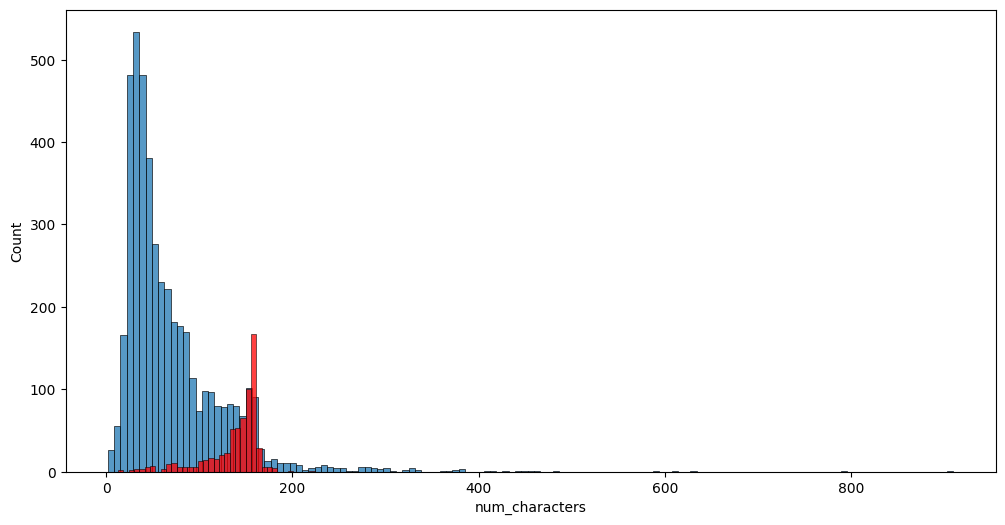

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

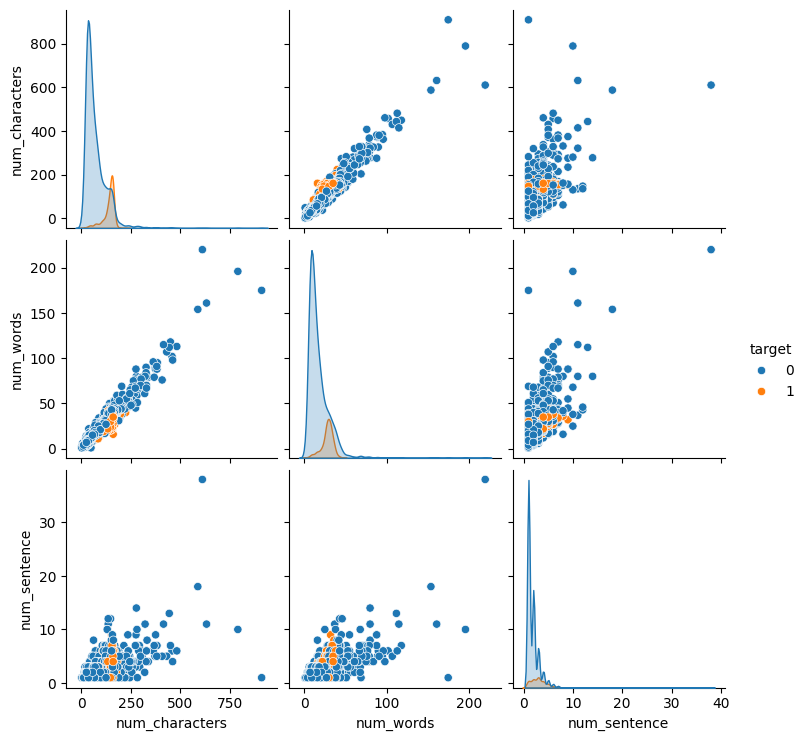

In [30]:
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

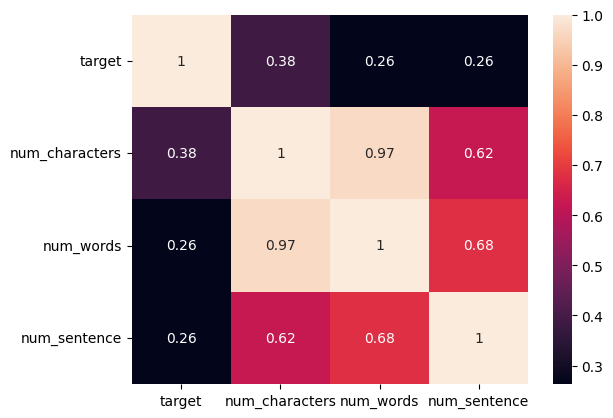

In [31]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)

#### From the heatmap, we can conclude that there is multicollinearity in the data and we cannot use all the features for model building. We will use num_characters feature for model building because it has the highest correlation value compared to the other features.

## Data Preprocessing

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [33]:
import string
from nltk.corpus import stopwords

In [34]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)  #for removing special characters and punctuations and words with digits
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
df['transformed text']=df['text'].apply(transform_text)

In [38]:
df.sample(5)

,target,text,num_characters,num_words,num_sentence,transformed text
4994,0,"Just looked it up and addie goes back Monday, ...",61,14,1,look addi goe back monday suck
4347,0,You give us back my id proof and &lt;#&gt; r...,113,32,3,give us back id proof lt gt rs wont allow work...
5478,0,No probably &lt;#&gt; %.,25,11,1,probabl lt gt
906,1,"all the lastest from Stereophonics, Marley, Di...",162,32,3,lastest stereophon marley dizze racal libertin...
391,0,Hey so this sat are we going for the intro pil...,80,18,2,hey sat go intro pilat kickbox


In [39]:
# Drop the 'transformed text' column from its current position
transformed_text_column = df['transformed text']
df = df.drop(columns=['transformed text'])

# Get the index of the 'text' column
text_column_index = df.columns.get_loc('text')

# Insert the 'transformed text' column after the 'text' column
df.insert(text_column_index + 1, 'transformed text', transformed_text_column)

# Display the dataframe to verify the column order
display(df.head())

,target,text,transformed text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,15,1


## EDA

In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [41]:
spam_wc=wc.generate(df[df['target']==1]['transformed text'].str.cat(sep=' '))

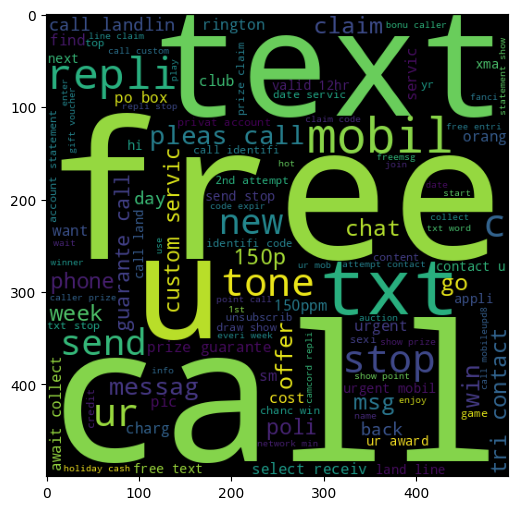

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

## Most frequent words of spam emails

Certainly! The code you selected is used to generate a word cloud specifically for the spam emails in your dataset.

Here's a breakdown of the code:

*   **`spam_wc = wc.generate(df[df['target']==1]['transformed text'].str.cat(sep=' '))`**:
    *   `df[df['target']==1]`: This part filters the DataFrame to select only the rows where the 'target' column is equal to 1, which corresponds to spam emails.
    *   `['transformed text']`: This selects the 'transformed text' column from the filtered spam emails. This column contains the cleaned and processed text.
    *   `.str.cat(sep=' ')`: This is a pandas string method that concatenates all the strings in the selected Series (the 'transformed text' of spam emails) into a single large string, with each text joined by a space.
    *   `wc.generate(...)`: This is the core part that uses the `WordCloud` object (`wc` which was likely created in a previous cell) to generate a word cloud from the concatenated spam text. The `generate()` method takes a string as input and creates a word cloud object based on the frequency of words in the text.
    *   `spam_wc = ...`: The resulting word cloud object is stored in the variable `spam_wc`.

In essence, this code prepares the text from all spam emails by joining them into a single string and then uses the `WordCloud` library to create a visual representation where the size of each word is proportional to its frequency in the spam messages. This helps in visualizing the most common words found in spam emails.

## Now we have a look at the most frequent words of the ham emails

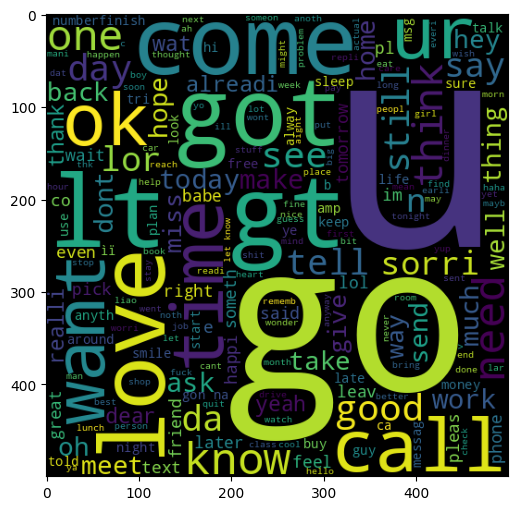

In [43]:
ham_wc=wc.generate(df[df['target']==0]['transformed text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

### Now we create the corpus for spam and ham emails

In [44]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

print(len(spam_corpus))

9939


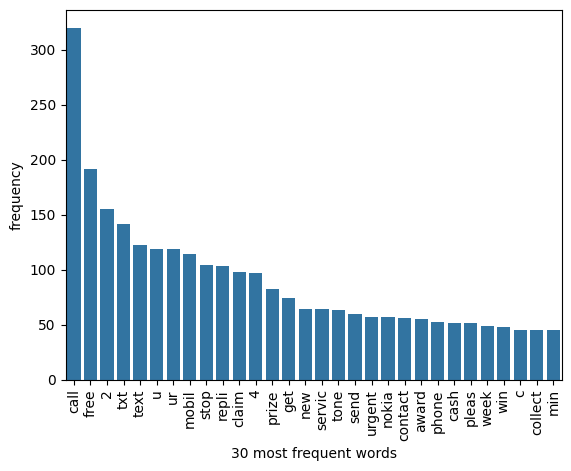

In [45]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("30 most frequent words")
plt.ylabel("frequency")
plt.show()

In [46]:
pd.DataFrame(Counter(spam_corpus).most_common(30))
# returns the frequency of the most common 30 words in descending order as a list

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [47]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

print(len(ham_corpus))

35404


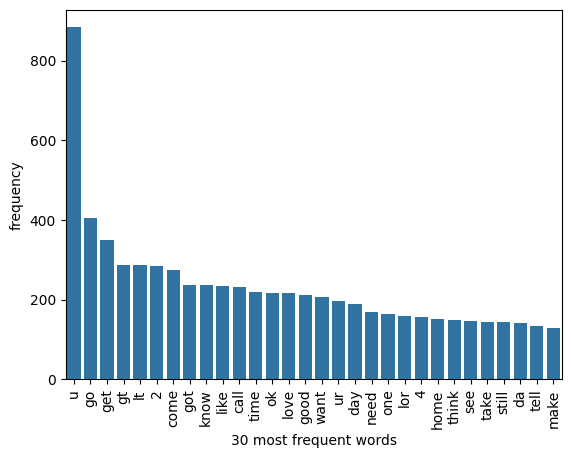

In [48]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("30 most frequent words")
plt.ylabel("frequency")
plt.show()

## Modelling

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [52]:
X=tfidf.fit_transform(df['transformed text']).toarray()

A **sparse matrix** is a matrix where most of the elements are zero. Instead of storing every single element (including all the zeros), a sparse matrix storage format only stores the non-zero elements and their locations (row and column indices). This is much more memory-efficient and can speed up computations when dealing with very large matrices that have a high percentage of zeros.

In the context of `CountVectorizer` or `TfidfVectorizer`, the resulting matrix is often sparse because most documents will only contain a small subset of the entire vocabulary, meaning most entries in the document-term matrix will be zero.

The **`.toarray()`** method is a function that you call on a sparse matrix object. Its purpose is to convert the sparse matrix into a dense NumPy array. A **dense array** (or dense matrix) is the standard way of representing a matrix where every element, including the zeros, is stored in memory.

When you call `.toarray()`, you are essentially converting the memory-efficient sparse representation back into a full, standard matrix representation.

**Why would you use `.toarray()`?**

While sparse matrices are great for storage and some computations, many machine learning algorithms and other functions in libraries like scikit-learn expect a dense NumPy array as input. So, you often need to convert the sparse matrix to a dense array using `.toarray()` before passing it to these functions.

**In summary:**

*   **Sparse Matrix:** Memory-efficient representation for matrices with many zeros, storing only non-zero elements.
*   **`.toarray()`:** Converts a sparse matrix into a dense NumPy array, where all elements (including zeros) are explicitly stored.

You would use a sparse matrix for efficient storage and computation on large, sparse data, and use `.toarray()` when you need to work with the data in a standard dense array format.

In [55]:
y=df['target'].values

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
mnb=MultinomialNB()

In [60]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

In [61]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [64]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))